# Affective signals III
----
<span style="color:Blue">**Through this notebook we hope you get an hands on approach to the seminar. 
    Below you will find code snippets and theory that will help you apply the various libraries that have been introduced to you in the course.**</span>

----

In [ ]:
! pip install opensmile
! pip install audiofile

! pip install praat-parselmouth
! pip install sox
! pip install praat-parselmouth

In [ ]:
# mount your Google Drive, where your video is located

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import opensmile
import audiofile
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
from scipy.io.wavfile import read
import numpy as np 
from IPython.display import Audio, display

import seaborn as sns
#parselmouth
import parselmouth
sns.set()

## **Voice**
----
#### Speech as we know is a primary mode of communication.We will be using parselmouth to create some visualizations and OpenSmile to extract the relevant features.
----
First lets try to extract your audio from the mp4 files 

In [ ]:
#path to your video
# make sure when extracting the soundfile your video specifications are correct (.mp4 or .avi) and output file is .wav
# e.g.
# !ffmpeg -i "/content/drive/MyDrive/AffectiveSignals/video.mp4" -vn -acodec pcm_s16le -ar 16000 -bits_per_raw_sample 16 -ac 1 "/content/drive/MyDrive/AffectiveSignals/sound_file_mono.wav"  -y

!ffmpeg -i "path to video" -vn -acodec pcm_s16le -ar 16000 -bits_per_raw_sample 16 -ac 1 "output_soundfile_wav"  -y


#if you have the audio file then you dont need to extract the audio from your video

In [ ]:
#Read the Audiofile here you need to input the location of your file 
# samplerate, data = read("/content/drive/MyDrive/AffectiveSignals/sound_file_mono.wav")
samplerate, data = read("path_to_sound")

   Play your extracted audio to just see if its your own audio :)

In [ ]:
#path of your audio files
#Audio("/content/drive/MyDrive/AffectiveSignals/sound_file_mono.wav",rate=samplerate)
Audio("path_to_sound",rate=samplerate)

### Speech signals

  
Speech signals are sound signals, defined as pressure variations travelling through the air. These variations in pressure can be described as waves and correspondingly they are often called sound waves. These sound signals can be plotted to visualize them.

#### Raw waveform

In [ ]:
#this creates a object that contain all the required information about parselmouth
# snd = parselmouth.Sound("/content/drive/MyDrive/AffectiveSignals/sound_file_mono.wav")
snd = parselmouth.Sound("your audio_mono.wav")
#using the data extracted by parselmouth lets plot the raw waveform 
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

#### Spectrogram
   A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

   [Some cool spectrogram visualizations](https://musiclab.chromeexperiments.com/spectrogram-service/?ln=nl_BE)

In [ ]:
#funtions courtesy of https://parselmouth.readthedocs.io/en/stable/examples/plotting.html
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
#the snd object that was created has methods to convert to spectrogram
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

### Feature Extraction
 Here we are using the predefined feature set ComParE_2016. We use Opensmile for the feature extraction process.   
  In the following cells we will be concentrating on the few important features related to the Speech. These include Intensity, Fundamental Frequency , Shimmer and Jitter. **The Tasks for this sheet will be an open task meaning you will have to think about what statistical aspects you want to look at for a particular feature. (At least one as you did for the previous Notebooks)**.
  Below you see all the features that can be extracted from opensmile and also the highlighted features are the ones we will be looking closely in this notebook.



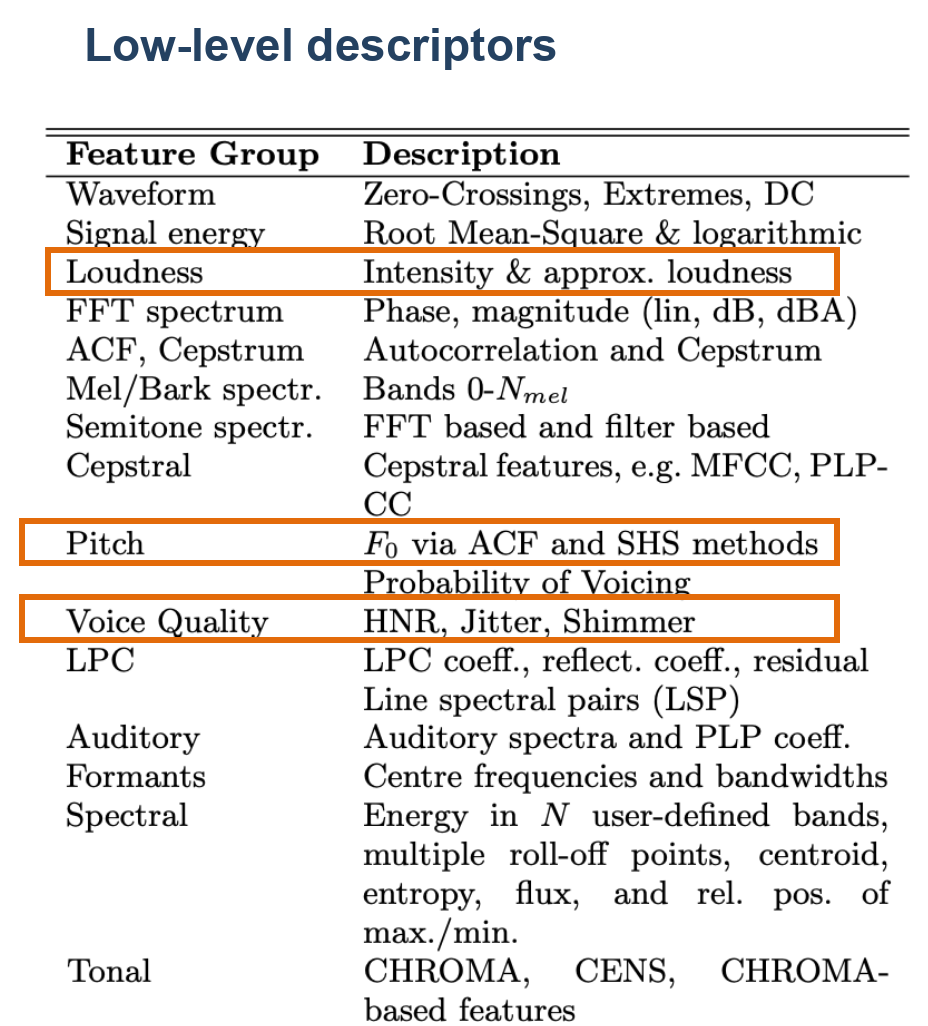

   Before we see look at the different features , lets see how to extract them using OpenSMile. The below cell provides the code to extract a feature set from a speech signal.

In [ ]:
#configuration for what are the features that are extracted by opensmile. 
smile_ComParE_2016_lld = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)
#change the path to your file 
features_extracted_lld = smile_ComParE_2016_lld.process_file("your audio_mono.wav")

#configuration for what are the features that are extracted by opensmile. 
smile_ComParE_2016_functionals = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)
#change the path to your file 
features_extracted_functionals = smile_ComParE_2016_functionals.process_file("your audio_mono.wav")

In [ ]:
#list of all the low level descriptor feature names
smile_ComParE_2016_lld.feature_names

In [ ]:
#list of all the functional feature names
smile_ComParE_2016_functionals.feature_names

In [ ]:
#dataframe of the low level features extracted
features_extracted_lld

In [ ]:
#dataframe of the functional features extracted 
features_extracted_functionals

#### Loudness 
  The amplitude of the vibrations (i.e. the size of the oscillations of the vocal folds) that affects loudness. The greater the amplitude of the vibrations, the greater the amount of energy carried by the wave, and the more intense the sound will be.

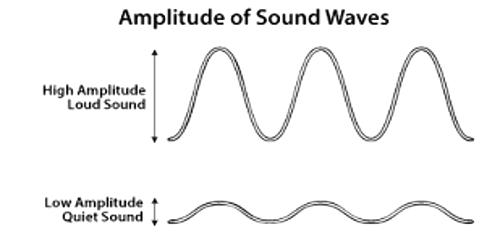
[source](https://www.sltinfo.com/loudness/)

In [ ]:
#plot for the Intensity
plt.plot(features_extracted_lld["audspec_lengthL1norm_sma"].values)

#### Task 3.1  Analysis of Loudness:

In [ ]:
#Here you can put your code for the analysis:

In [ ]:
# *Your interesting findings* :

#### Fundamental Frequency ($F_0 $)
  The  fundamental  frequency,  measured  in  Hertz,  is  defined  as  the  number  of  times  a  sound  wave  produced  by  the  vocal  cords repeats during a given time period. It has a typical range of values it can take depending on the gender and age of the person.


    
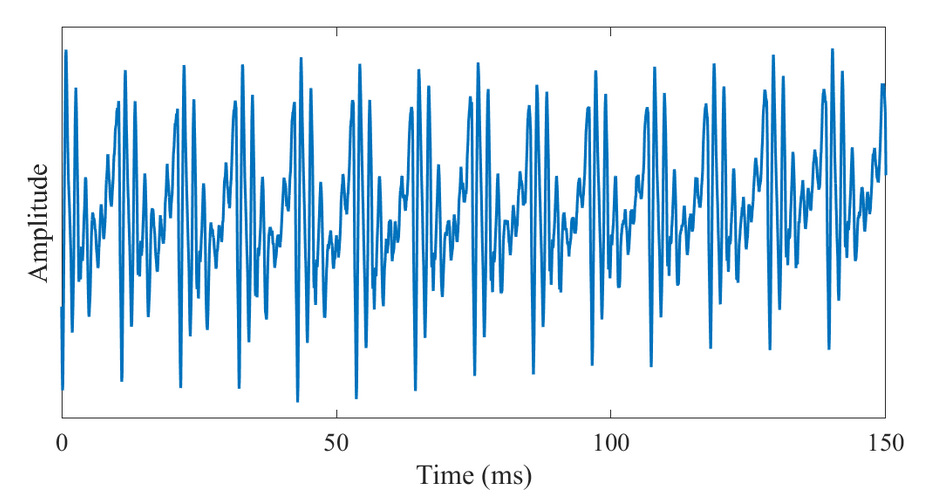

A speech signal with a fundamental frequency of approximately F0=93Hz.[source](https://wiki.aalto.fi/pages/viewpage.action?pageId=149890776)





#### *Plot the fundamental frequency over time:*

In [ ]:
#plot for the fundamental frequency 
plt.plot(features_extracted_lld["F0final_sma"].values)
#each time interval is 1ms
plt.xlabel('Time-intervals')
plt.ylabel('Frequency')

#### Functions to play around with the pitch of your voice

In [ ]:
#again function courtesy of https://parselmouth.readthedocs.io/en/stable/examples/pitch_manipulation.html
from parselmouth.praat import call
def change_pitch(sound, factor):
    manipulation = call(sound, "To Manipulation", 0.01, 75, 600)

    pitch_tier = call(manipulation, "Extract pitch tier")

    call(pitch_tier, "Multiply frequencies", sound.xmin, sound.xmax, factor)

    call([pitch_tier, manipulation], "Replace pitch tier")
    return call(manipulation, "Get resynthesis (overlap-add)")

In [ ]:
import ipywidgets
def interactive_change_pitch(factor):
    sound_changed_pitch = change_pitch(snd, factor)
    return Audio(data=sound_changed_pitch.values, rate=sound_changed_pitch.sampling_frequency)

w = ipywidgets.interact(interactive_change_pitch,
                        factor=ipywidgets.FloatSlider(min=0.25, max=4, step=0.05, value=1.5))

#### Task 3.2 Analysis of Fundamental Frequency:

In [ ]:
#Here you can put your code for the analysis:


In [ ]:
# *Your interesting findings* :

#### Jitter and Shimmer
  Measurements  of  F0  disturbance has  proven  to  be  useful  in  describing  the  vocal  characteristics. The two important disturbances are Jitter and Shimmer. Jitter  is  defined  as  the  parameter  of  frequency  variation  from  cycle  to  cycle,  and  shimmer  relates  to  the  amplitude  variation  of  the  sound  wave. 



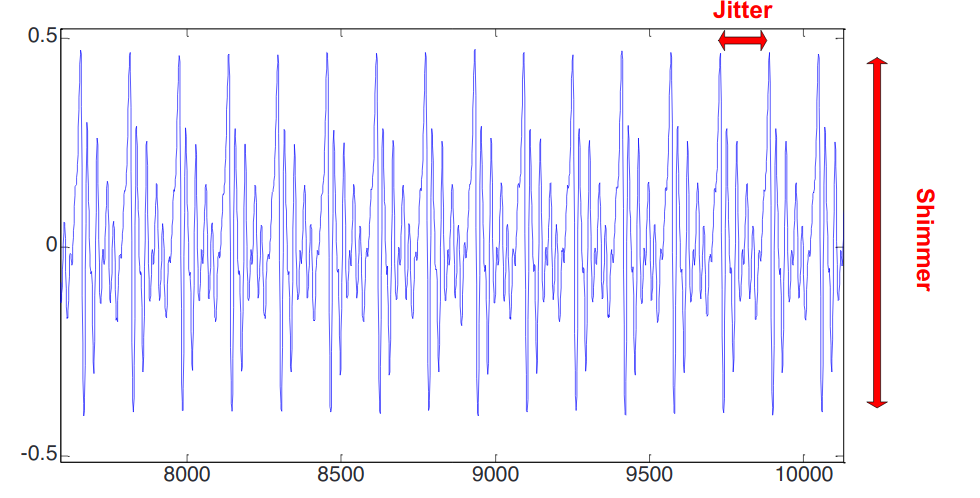 [source](https://www.sciencedirect.com/science/article/pii/S2212017313002788)

In [ ]:
#plot for the shimmer
plt.plot(features_extracted_lld["shimmerLocal_sma"].values)

In [ ]:
#plot for the jitter
plt.plot(features_extracted_lld["jitterLocal_sma"].values)    

#### Task 3.3 and 3.4 Analysis of Jitter and Shimmer:

In [ ]:
#Here you can put your code for the analysis:

In [ ]:
# *Your interesting findings* :